In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
%matplotlib inline
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#Used this example https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [4]:
U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_pytorch.npy')
V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy').T
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp)
X=zscore(X).T

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


In [8]:
print(U.shape)
print(U[:,0])
print(X.shape)
print(X.shape[1]//2)

(10103, 150)
[0.        0.        0.6480185 ... 0.7842378 0.        0.       ]
(10103, 5880)
2940


In [37]:
trainY,testY=X[2,:2940],X[2,2940:]
trainX, testX=V[0,:2940].reshape(2940,1),V[0,2940:].reshape(2940,1)
print(y_train.shape,y_test.shape)
print(train.shape,test.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

(2940,) (2940,)
(2940,) (2940,)


In [38]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/10
 - 5s - loss: 1.0334
Epoch 2/10
 - 4s - loss: 1.0302
Epoch 3/10
 - 5s - loss: 1.0301
Epoch 4/10
 - 5s - loss: 1.0299
Epoch 5/10
 - 4s - loss: 1.0297
Epoch 6/10
 - 5s - loss: 1.0297
Epoch 7/10
 - 4s - loss: 1.0291
Epoch 8/10
 - 5s - loss: 1.0291
Epoch 9/10
 - 4s - loss: 1.0291
Epoch 10/10
 - 4s - loss: 1.0300


[[1.         0.99976317]
 [0.99976317 1.        ]]


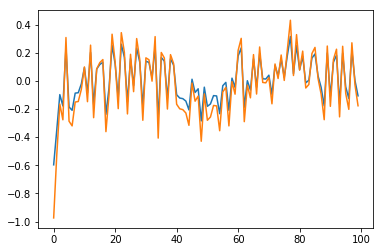

In [40]:
import matplotlib.pyplot as plt

plt.plot(testPredict[:100,0])
plt.plot(testX.reshape(testX.shape[0],1)[:100,0])
print(np.corrcoef(testPredict[:,0],testX.reshape(testX.shape[0],1)[:,0]))


In [41]:
#Negative Control -- Neuron nr 0 that is not in the ensemble

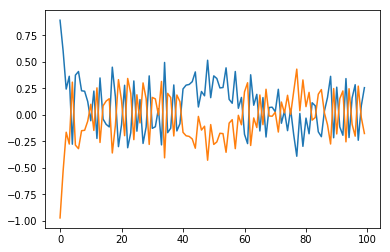

In [34]:
import matplotlib.pyplot as plt

plt.plot(testPredict[:100,0])
plt.plot(testX.reshape(testX.shape[0],1)[:100,0])


In [36]:
print(np.corrcoef(testPredict[:,0],testX.reshape(testX.shape[0],1)[:,0]))

[[ 1.         -0.99943021]
 [-0.99943021  1.        ]]
